# Load Bureau of Meteorology (BoM) Solar Irradiance Products

* **Products used:**
[Solar Irradiance](https://dapds00.nci.org.au/thredds/catalog/rv74/satellite-products/arc/der/himawari-ahi/solar/p1d/latest/catalog.html)
[DEA Product to be added]

## Background

Surface solar irradiance measurements are increasingly critical to the solar energy industry
and are important to evaluate weather and climate model.  

Bureau of Meteorology (BoM) employed the Heliosat-4 radiation model (Qu et al, 2017) as implemented by Mines ParisTech (Gschwind et. al., 2020) to estimate downwelling solar radiation parameters. Heliosat-4 uses estimates of cloud properties derived from satellite observations, estimates of aerosol optical depth, and forecasts of atmospheric ozone and water vapour to estimate instantaneous surface global solar irradiance (known as global horizontal irradiance, GHI) in units of Wm-2. Heliosat-4 also produces estimates of the instantaneous intensity of surface direct horizontal irradiance (BHI) in units of Wm-2, from which the solar direct beam radiation falling on a surface normal to the beam (known as the direct normal irradiance, DNI, with units W m-2 is calculated. 

For further detail on the solar irradiance products, please see the [Gridded satellite solar observations project: Implementation of Heliosat-4 and the application of bias correction](http://www.bom.gov.au/research/publications/researchreports/BRR-062.pdf) research report.  

## Description

This notebook shows a simple comparison of daily solar irradiance between areas with and without solar farms. It demonstrates the following steps:
1. Retrieval of daily solar irradiance products through NCI's THREDDS OPeNDAP service
2. Compare time series daily solar irradiance between areas with and without solar farms.

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [2]:
%matplotlib inline
import datacube
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
from dea_tools.plotting import display_map, rgb
from load_solar_irradiance import load_solar_irradiance

### Analysis parameters

Define location and time period of interest.
The time period is chosen to be no more than a year to limit data download.

In [3]:
# Define buffer around selected location
buffer=0.05

# # around Melbourne
# lat=-37.829
# lon=145.119

# # around Chichester Solar Farm
# lat=-22.420
# lon=119.747

# around Limondale Solar Farm
lat=-34.756
lon=143.509

# Define the analysis region (Lat-Lon box)
lat_range = (lat-buffer,lat+buffer)
lon_range = (lon-buffer,lon+buffer)

# Define the time window
time = ("2022-01-01", "2023-01-01")

# Define variables to query
var_names=['daily_integral_of_surface_global_irradiance',
           'daily_integral_of_surface_diffuse_irradiance']

## View the queried location

In [4]:
display_map(x=lon_range, y=lat_range)

## Retrieval of solar irradiance

In [ ]:
# Retrieve surface soil moisture using query parameters
daily_solar_irrd = load_solar_irradiance(lat_range, lon_range, time, var_names=var_names,grid="nearest")
daily_solar_irrd

### Plot over time

In [ ]:
daily_solar_irrd.daily_integral_of_surface_global_irradiance.plot(col='time')

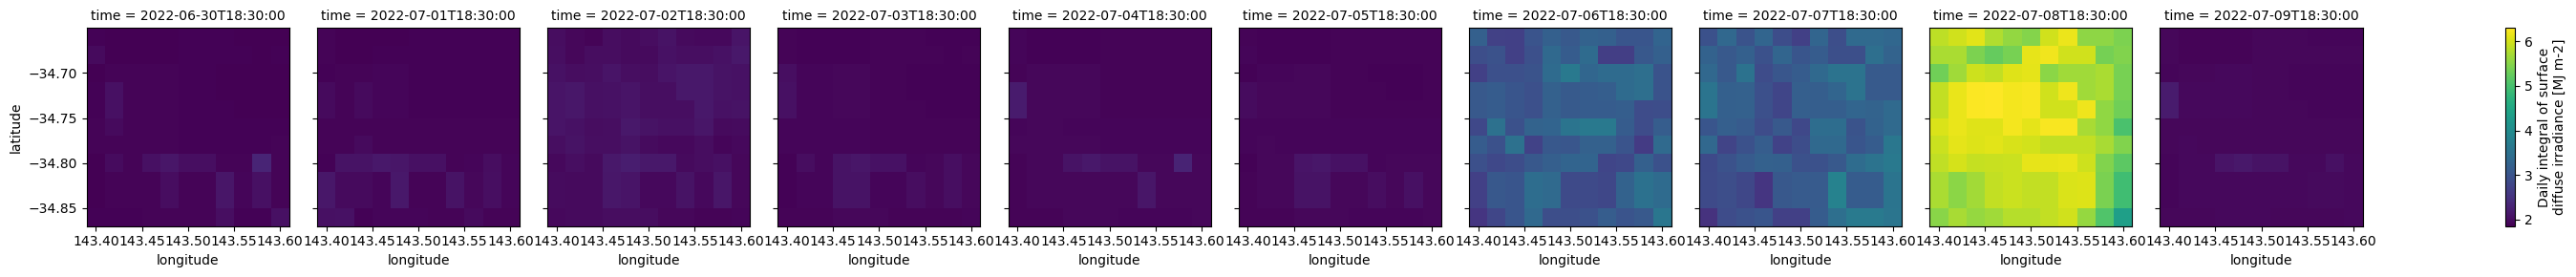

In [44]:
daily_solar_irrd.daily_integral_of_surface_diffuse_irradiance.plot(col='time')

### Plot time series

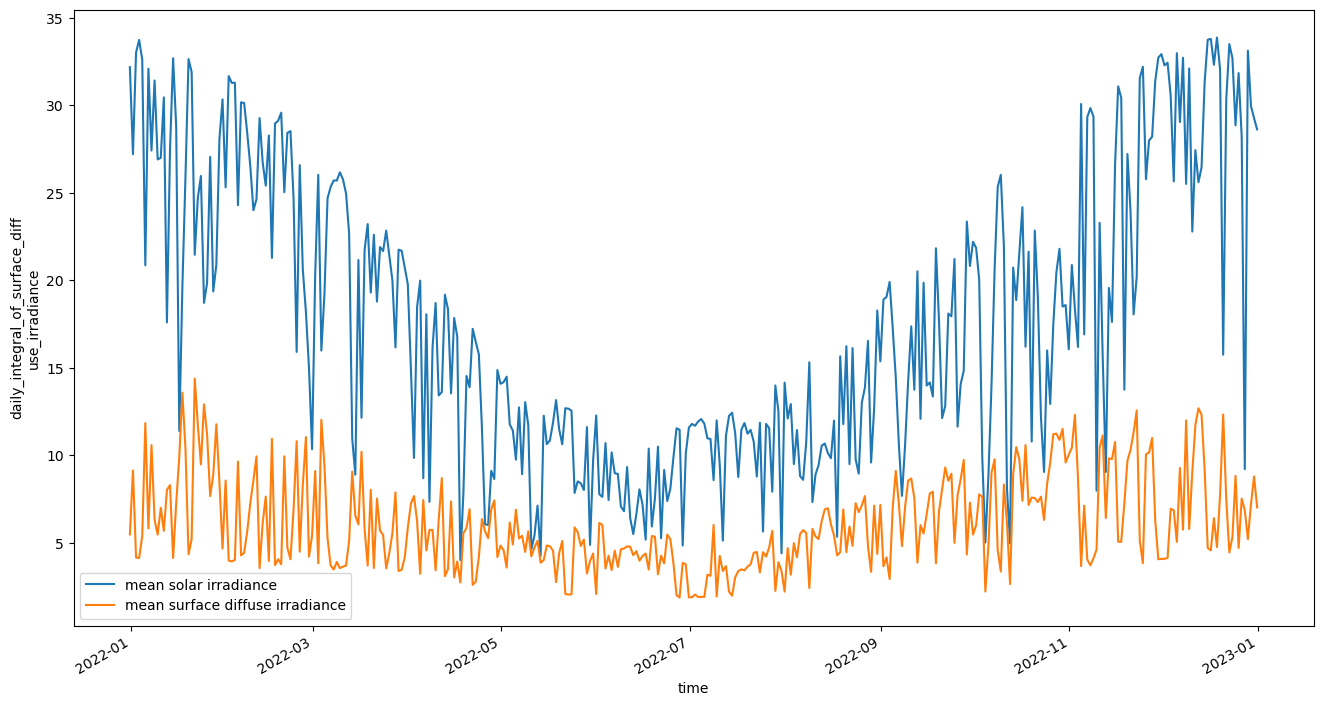

In [7]:
daily_solar_irrd.daily_integral_of_surface_global_irradiance.mean(["latitude", "longitude"]).plot(
    figsize=(16, 8), label="mean solar irradiance"
)
daily_solar_irrd.daily_integral_of_surface_diffuse_irradiance.mean(["latitude", "longitude"]).plot(
    label="mean surface diffuse irradiance"
)
plt.legend()

## Compare with some product from DEA

To be added

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** August 2023

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)